In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from io import StringIO

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

import numpy as np 
import pandas as pd 








In [44]:
###ANÁLISE DO ARQUIVO bank-full.csv

In [45]:
df3=pd.read_csv('bank-full.csv', sep = ";")

In [46]:
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [47]:
# O dataframe contém muito mais observações dp que a versão resuzida, bank.csv
#bank-full.csv Contem 45210 linhas de observações (à primeira linha corresponde aos títulos) 
#, 17 variáveis, sendo a última, y, representando a 
# a variável sendo explicada pelas demais features, o resultado da campanha de Marketing.

In [95]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [96]:
#Analisando-se o dataframe acima podemos classificar as variáveis do problema em:
    
    #Variáves categóricas: job, marital ,education, default, housing ,loan ,contact,month ,poutcome,y
    
    #Variáveis numéricas: age, balance,day,duration,campaign,pdays, previous

In [97]:
# Das informações sobre o dataframe acima, vemos que não existem null values no dataframe inteiro.
#Iremos checar mais a frente se algum string ou caracter especial pode representar algo equivalente a 
#um null value. 
# , Logo não temos ocorrências de N/A's ou NaN's, que são tipos próprios para null values. 
#Isso não significa que não hajam 
# null values sob outras formas de informação ao longo das linhas de dados. 
# Por exemplo, analisando-se as observações do dataframe acima vÊ-se que várias variáveis apresentam 
#o valor "unknown",
# INdicando a presença de valores faltantes. Isso será tratado mais adiante!@@@!!

# Vê-se tanbém que só há dois tipos de dados nesse dataframe: inteiros e ojbjects.

In [98]:
# calculando-se estatísticas descritivas para as variáveis não-categóricas

df3.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [99]:
# Das estatísticas descritivas calcladas para as variáveis acima, podemos ver:

# - A idade médi das pessoas envolvidas na campanha é cerca de 41 anos.
# - A duração média dos contatos, é de 258 segundos.
# valor médio de campaign: número de contatos feitos nessa campanha, em média, para os clientes, foi de 2,76.
# o valor médio de pdays (o número de dias qnue se passaram após o 
#cliente ter sido contacttado pela última vez) foi de cerca de 40 dias.
# da média de 'previous' vemos que, em média, o número de contatos efetuados antes dessa campanha foi de 
# 2,3 dias.

In [100]:
# Analisando valores únicos da variável resposta y:
df3.y.unique()

array(['no', 'yes'], dtype=object)

In [101]:
# Portanto só há dois valares possíveis para essa variável

In [102]:
# Analisando/ printando os valores distintos do dataframe bruto para as demais variáveis categóricas:
#job, marital ,education, default, housing ,loan ,contact,month ,poutcome,y
print("job distinct values:"+" ", df3.job.unique()+ " ")
print("\n")
print("marital distinct values:" + " ", df3.marital.unique()) 
print("\n")
print("education distinct values:" + " ", df3.education.unique()) 
print("\n")
print("default distinct values:" + " ", df3.default.unique()) 
print("\n")
print("housing distinct values:" + " ", df3.housing.unique()) 
print("\n")
print("loan distinct values:" + " ", df3.loan.unique()) 
print("\n")
print("contact distinct values:" + " ", df3.contact.unique()) 
print("\n")
print("month distinct values:" + " ", df3.month.unique()) 
print("\n")
print("poutcome distinct values:" + " ", df3.poutcome.unique()) 
print("\n")
print("y distinct values:" + " ", df3.y.unique()) 
print("\n")

job distinct values:  ['management ' 'technician ' 'entrepreneur ' 'blue-collar ' 'unknown '
 'retired ' 'admin. ' 'services ' 'self-employed ' 'unemployed '
 'housemaid ' 'student ']


marital distinct values:  ['married' 'single' 'divorced']


education distinct values:  ['tertiary' 'secondary' 'unknown' 'primary']


default distinct values:  ['no' 'yes']


housing distinct values:  ['yes' 'no']


loan distinct values:  ['no' 'yes']


contact distinct values:  ['unknown' 'cellular' 'telephone']


month distinct values:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


poutcome distinct values:  ['unknown' 'failure' 'other' 'success']


y distinct values:  ['no' 'yes']




In [103]:
# Variáveis categóricas com 'unknown' values:
# Da plotagem dos valores distintos das variáveis categóricas acima, vemos que as variáveis

# poutcome, contact, education e job apresentam valores faltantes na forma de 'unknowns'.
# Precisamos primeiro saber o número de ocorrências de unkowns em cada variável desta.


In [104]:
# COntando o número de observações para cada categoria de cada vari´avel categórica 
#com valores 'unknow'

In [114]:
# AS categorias de poutcome - resultado das campanhas prévias de Marketing
df3.groupby('poutcome')['poutcome'].count()

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64

In [115]:
percentage_de_unknowns_em_poutcome = 36959/45210
percentage_de_unknowns_em_poutcome

0.8174961291749613

In [116]:
# AS categorias de contact - tipo de comuicação usada no contato
df3.groupby('contact')['contact'].count()

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64

In [117]:
percentage_de_unknowns_em_contact = 13020/45210
percentage_de_unknowns_em_contact

0.28798938287989384

In [118]:
# AS categorias de education - educação
df3.groupby('education')['education'].count()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64

In [119]:
percentage_de_unknowns_em_education = 1857/45210
percentage_de_unknowns_em_education

0.04107498341074983

In [120]:
# AS categorias de job 
df3.groupby('job')['job'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64

In [121]:
# Análise do número de ocorrÊncias de unknowns nas variáveis categóricas acima:
 #Pode-se ver que as variáveis poutcome e contact possuem um grande número e observações 'unknown',

# Sendo que poutcome possui a garde maioria (quase a totalidade ) das suas observações comom sendo
# 'unknown' (cerca de 82%). Ou seja, das 45210 observações dessa variável, 36959 são unknown. 

# Isso implica que, se formos elimar todas as linhas de observações desse dataframe que tenham 
#'unknown', 
#perderíamos cerca de 82% dos dados do dataframe, somente considerando a eliminação de tais valores 
#dessa variável

# Para a variável 'contact' cerca de 29% das observações são do tipo 'unknown'.

#  A sewguir iremos discutir possíveis estratégias de lidar com essa dificuldade

In [122]:
# Contando as ocorrências de cada categoria de y:
df3.groupby('y')['y'].count()


y
no     39922
yes     5289
Name: y, dtype: int64

In [123]:
# Verifica-se que, mesmo sem se eliminar linha nehuma do dataframe, as classes da variável resposta 
# são desbalanceadas. A categoria yes é minoritária, possuindo derca de 13% do número de vezes que
# , ocorrem a categoria 'no'.
# A seguir iremos discutir possíveis estratégias para lidar com essa realidade.

In [124]:
# POssíveis estratégias para lidar com os valores unknow das features


#Possíveis estratégias de serem consideradas para os valores 'unknown' nas variáveis que podem assumir esse valor:
#) 1) Eliminar todas as linhas que possuem valores unknown do dataframe. Como já comentado antyeriromente, isso acarretaria em um número muito pequeno de observações.

#2) Substituir essdes vaçores por informações derivadas da experioência das pessoas que fizerma os contatos com o público-alvo
# da campanha. Infelizmente essa opção está descartada pois não há essa possibilidade.

# Manter esses valores no dataframe e tratá-los como mais uma categoria, cujo rótulo não conhecemos com certeza (isto é
# Admitirmos que pelo menos os rótulos das variáveis categóricas correspondentes à unknown não são conhecidos com certeza;
#, isto é, apresentam ruído. Neste caso, podemos adotar um algoritmo de MAchine Learning
# robusto à ruído nos rótulos das categorias . Essa opção será a adotada aqui.

In [125]:
# Possíveis estratégias para se lidar com as classes desbalanceadas da variável resposta y

# COm relação a classes não-balanceadas na variável rssposta, vÊ-se duas opções de ação:
#1) Se manter todas as observações da classe minoritária,e se fazer uma sub-amostragem nas observações do dataframe correspondentes 
# à classe majoritária, de forma que nessa amostra tenhamos um número igual ou próximo ao número de observações da classe minori
# , tária.

#2) Se adotar um método classificação de Machine Learning robusto À classes desbalanceadas. A princípio iremos proceder com essa 2a 
# opção.

In [126]:
# Checando se existem null values que não vimos ainda:



In [127]:
df3.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [128]:
# Logo não há Null values no dataframe

In [137]:
Y=df3['y']
X = df3.drop('y', axis = 1)

In [138]:
type(Y)

pandas.core.series.Series

In [131]:
X_tudo = df3

In [132]:
X_tudo1 = df3

In [133]:
X_tudo.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [139]:
Y=Y.to_frame()
Y

,y
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [140]:
X.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


In [141]:
X.shape

(45211, 16)

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

In [143]:
print(Y.shape)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(45211, 1)
(45211, 16)
(27126, 16)
(18085, 16)
(18085, 1)
(27126, 1)


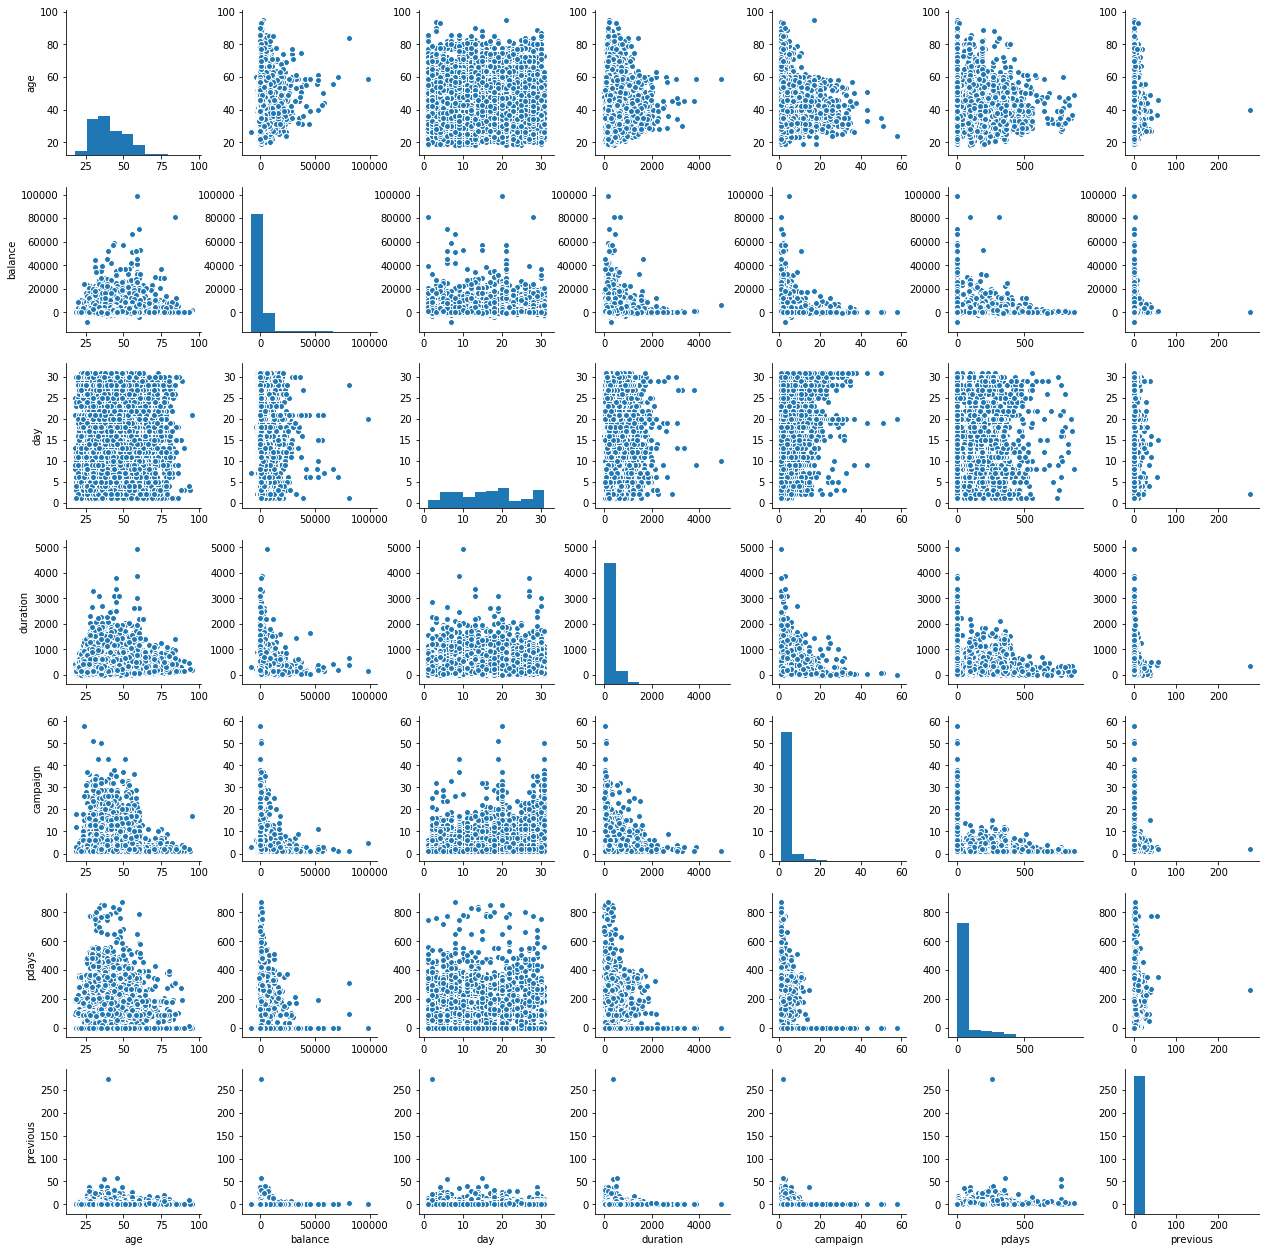

In [144]:
# Matriz de gráficos de dispersão (Scatterplot matrix) para o oconjunto X_train
sns.pairplot(X_train,diag_kind='hist')

In [145]:
# A nalisando-se a matriz de gráficos de dispersão acima, vemos que, para as variáveius não categóricas
# não há nenhum par de features que apresente um padrão de correlação que mereça muita atenção/destaque.
# Portanto, não há nenhum par de feaures que tenha um padrão de correlação importante no conjunto de treinamento.

In [146]:
# COmentários da matriz de scatterplots acima:

# Pode-se ver pelos gráficos de dispersão entre features não-categóricas acima, que amioria das features apresenta 
# Casos de outliers importantes. 
# Esses casos podem ser verificados nos boxplots abaixo.



{'boxes': [<matplotlib.lines.Line2D at 0x26733ef7550>],
 'caps': [<matplotlib.lines.Line2D at 0x26733ef7f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x26733efbcf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26733efb898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26733ef76a0>,
  <matplotlib.lines.Line2D at 0x26733ef7b38>]}

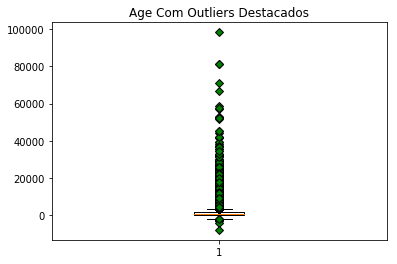

In [181]:
#plt.figure()
#plt.boxplot(X_train, 0, 'gD')

#fig, axs = plt.subplots(2, 3)

# basic plot
#axs[0, 0].boxplot(X_train)
#axs[0, 0].set_title('basic plot')

#plt.boxplot(X_train)
df = X_train['balance']
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Age Com Outliers Destacados')
ax1.boxplot(df, flierprops=green_diamond)

{'boxes': [<matplotlib.lines.Line2D at 0x26733f41390>],
 'caps': [<matplotlib.lines.Line2D at 0x26733f41eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x26733f48c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26733f487b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26733f41518>,
  <matplotlib.lines.Line2D at 0x26733f41a58>]}

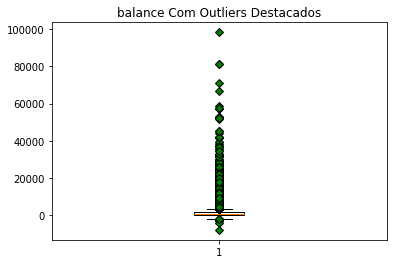

In [182]:
df = X_train['balance']
green_diamond = dict(markerfacecolor='g', marker='D')
fig2, ax2 = plt.subplots()
ax2.set_title('balance Com Outliers Destacados')
ax2.boxplot(df, flierprops=green_diamond)

In [183]:
# Na variável 'balance' também podemos identificar outliers, baseados em distâncias interquartis.

{'boxes': [<matplotlib.lines.Line2D at 0x267346eb828>],
 'caps': [<matplotlib.lines.Line2D at 0x267346f5390>,
 'fliers': [<matplotlib.lines.Line2D at 0x267346fd0f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x267346f5c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x267346eb9b0>,
  <matplotlib.lines.Line2D at 0x267346ebef0>]}

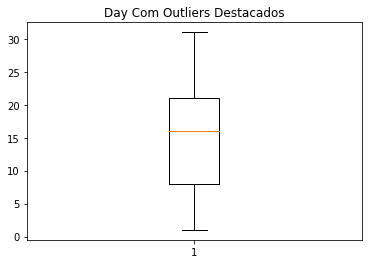

In [184]:
df = X_train['day']
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Day Com Outliers Destacados')
ax3.boxplot(df, flierprops=green_diamond)

{'boxes': [<matplotlib.lines.Line2D at 0x26734754128>],
 'caps': [<matplotlib.lines.Line2D at 0x26734754c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x2673475d9b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2673475d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x267347542b0>,
  <matplotlib.lines.Line2D at 0x267347547f0>]}

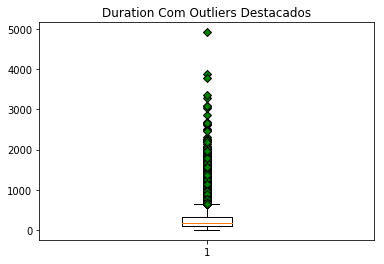

In [185]:
df = X_train['duration']
green_diamond = dict(markerfacecolor='g', marker='D')
fig4, ax4 = plt.subplots()
ax4.set_title('Duration Com Outliers Destacados')
ax4.boxplot(df, flierprops=green_diamond)

In [186]:
# Na variável 'duration' também podemos identificar outliers, baseados em distâncias interquartis.

{'boxes': [<matplotlib.lines.Line2D at 0x267347b34a8>],
 'caps': [<matplotlib.lines.Line2D at 0x267347b3fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x267347bbd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x267347bb8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x267347b3630>,
  <matplotlib.lines.Line2D at 0x267347b3b70>]}

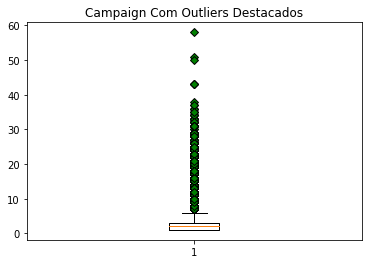

In [187]:
df = X_train['campaign']
green_diamond = dict(markerfacecolor='g', marker='D')
fig5, ax5 = plt.subplots()
ax5.set_title('Campaign Com Outliers Destacados')
ax5.boxplot(df, flierprops=green_diamond)

In [188]:
# Na variável 'campaign' também podemos identificar outliers, baseados em distâncias interquartis.

{'boxes': [<matplotlib.lines.Line2D at 0x26734810d68>],
 'caps': [<matplotlib.lines.Line2D at 0x2673481b8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26734822630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x267348221d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26734810ef0>,
  <matplotlib.lines.Line2D at 0x2673481b470>]}

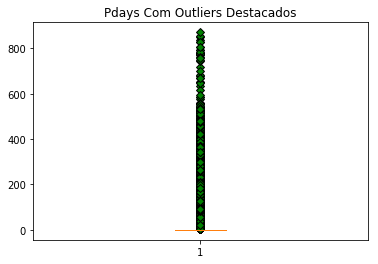

In [189]:
df = X_train['pdays']
green_diamond = dict(markerfacecolor='g', marker='D')
fig6, ax6 = plt.subplots()
ax6.set_title('Pdays Com Outliers Destacados')
ax6.boxplot(df, flierprops=green_diamond)

In [190]:
# Na variável 'pdays' também podemos identificar outliers, baseados em distâncias interquartis.

{'boxes': [<matplotlib.lines.Line2D at 0x2673486db38>],
 'caps': [<matplotlib.lines.Line2D at 0x267348786a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26734880400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26734878f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2673486dcc0>,
  <matplotlib.lines.Line2D at 0x26734878240>]}

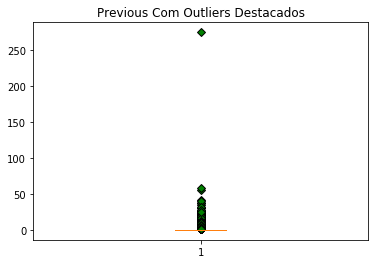

In [191]:
df = X_train['previous']
green_diamond = dict(markerfacecolor='g', marker='D')
fig6, ax6 = plt.subplots()
ax6.set_title('Previous Com Outliers Destacados')
ax6.boxplot(df, flierprops=green_diamond)

In [192]:
# Na variável 'Previous' também podemos identificar outliers, baseados em distâncias interquartis.

In [193]:
#print(Y.shape)
#print(X.shape)
#print(X_train.shape)
#print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(18085, 1)
(27126, 1)


In [194]:
# Matriz de correlações entre features em X_train:


corr = X_train.corr()
corr.style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
age,1,0.10607,-0.0108071,-0.00834393,0.00385762,-0.0186814,0.00263769
balance,0.10607,1,0.00501501,0.0212346,-0.0175075,0.00227389,0.0163593
day,-0.0108071,0.00501501,1,-0.0318316,0.163966,-0.0859333,-0.048475
duration,-0.00834393,0.0212346,-0.0318316,1,-0.0811307,-0.0060668,-0.0016431
campaign,0.00385762,-0.0175075,0.163966,-0.0811307,1,-0.0865095,-0.0292317
pdays,-0.0186814,0.00227389,-0.0859333,-0.0060668,-0.0865095,1,0.417652
previous,0.00263769,0.0163593,-0.048475,-0.0016431,-0.0292317,0.417652,1


In [195]:
# Análise da matriz de correlações do dataframe X_train:

#COmo analisado inicialmente na , matriz de gráficos de djispersão, não há correlações imporatntes entre features não-categóricas.
#Deve-se ressaltar que apenas as features 'previous' e 'pdays' apresentam correlação positiva não-desprezível: na ordem de 0.41.
# De uma forma geral, pode-se ignorar as correlações entre features nesse dataset.
# Dequalquer forma iremos manter as features 'porevious' e 'pdays' juntas, pois iremos usar um algoritmo de Machine Learning 
# que apresenta robustez a algum de grau de correlação entre features.

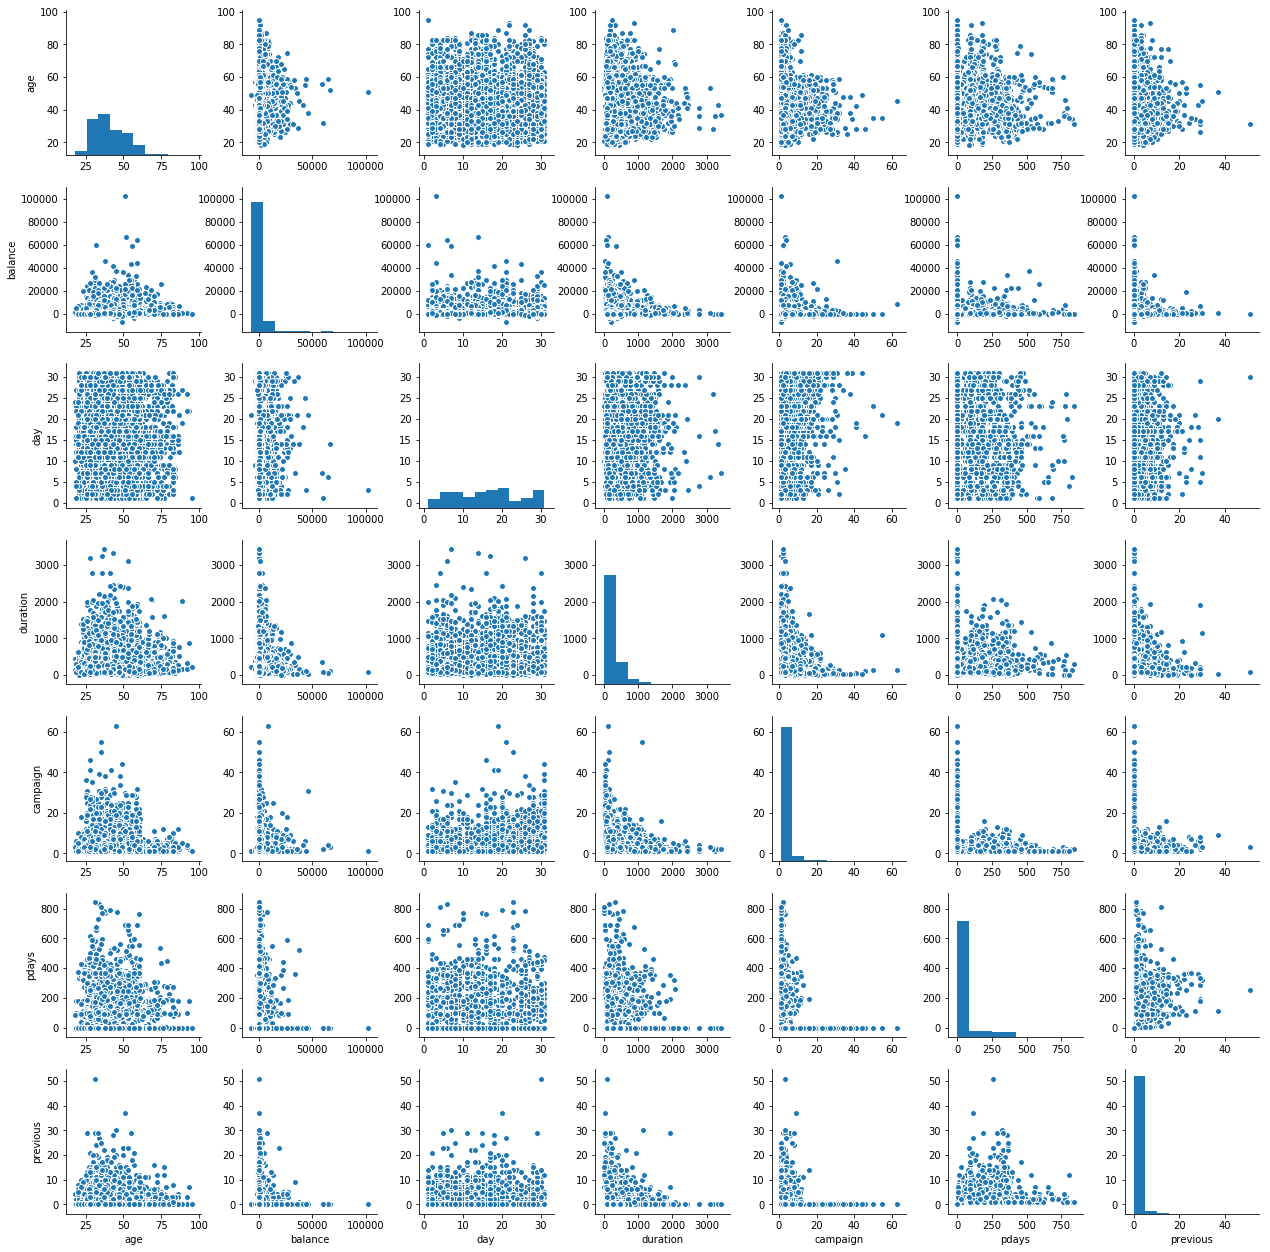

In [196]:
# Matriz de gráficos de dispersão (Scatterplot matrix) o oconjunto X_test
sns.pairplot(X_test,diag_kind='hist')

In [197]:
# COmentários da matriz de scatterplots acima:

# A nalisando-se a matriz de gráficos de dispersão acima, vemos que, para as variáveius não categóricas
# não há nenhum par de features que apresente um padrão de correlação que mereça muita atenção/destaque.
# Portanto, não há nenhum par de feaures que tenha um padrão de correlação importante no conjunto de treinamento.

# Pode-se ver pelos gráficos de dispersão entre features não-categóricas acima, que amioria das features apresenta 
# Casos de outliers importantes. .

# Entretanto, como iremos usar um método robusto à outliers, não iremos a princípio eliminar os outliers.

In [198]:
# Observações sobre possíveis métodos de elimonação de outliers que poderiam ser usados caso não se optase upo rum algoritmo robusto 
# à outliers:

# Caso fosse se proceder à eliminação de outliers, poder-se-ia usar, por exemplo, primeiro o método de identificação de outliers
# baseado no Z-score.
# depois de identificados poderiíamos eliminar os outliers.

# Essas etapas poderiam ser cumpridas com os comandos abaixo, realoizadas sobre um Pandas dataframe, caso assim se desejasse:




#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]



In [199]:
# Preprocessando  a variável resposta 

In [200]:
le = LabelEncoder()
X_tudo[['y']] = le.fit_transform(X_tudo[['y']])

C:\Users\Alfredo Ricardo\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [201]:
X_tudo[['y']].head(10)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [202]:
# Calculando Split em X_tudo
X_tudo1_train,X_tudo1_test,y_tudo1_train,y_tudo1_test=train_test_split(X_tudo1,Y,test_size=0.4,random_state=0)

In [203]:
X_tudo1_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25490,45,management,married,secondary,no,38,yes,no,cellular,19,nov,159,1,188,2,failure,0
20631,34,management,married,tertiary,no,520,yes,no,cellular,12,aug,1307,4,-1,0,unknown,1
3400,30,technician,married,tertiary,no,-256,yes,no,unknown,15,may,51,5,-1,0,unknown,0
17277,48,blue-collar,married,secondary,no,917,yes,no,cellular,28,jul,103,5,-1,0,unknown,0
24790,30,services,married,secondary,no,33,no,no,cellular,18,nov,36,1,-1,0,unknown,0


In [204]:
# Análise de variáveis categóricas via-a-vis os valores médios de depósitos, por cada categoria

In [205]:
# análise da variável job
X_tudo1_train[['job','y']].groupby('job',as_index=False).mean().sort_values('y',ascending=False)

,job,y
8,student,0.284153
5,retired,0.226251
10,unemployed,0.179221
4,management,0.135079
0,admin.,0.125243
11,unknown,0.122807
6,self-employed,0.122513
9,technician,0.109375
7,services,0.083832
2,entrepreneur,0.080135


In [201]:
# Análise de qual profissão tem mais propensão a fazer um empréstimo imobiliário (housing):
X_tudo1_train[['job','housing']].groupby('job',as_index=False).mean().sort_values('housing',ascending=False)

,job,housing
1,1,0.723700
7,7,0.673054
0,0,0.606100
2,2,0.592551
9,9,0.542694
4,4,0.491274
6,6,0.484817
10,10,0.384416
3,3,0.336538
8,8,0.262295


In [206]:
print(X_tudo1_train.shape)

(27126, 17)


In [208]:
X_tudo2 = X_tudo1

In [248]:
X_tudo1_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25490,45,management,married,secondary,no,38,yes,no,cellular,19,nov,159,1,188,2,failure,0
20631,34,management,married,tertiary,no,520,yes,no,cellular,12,aug,1307,4,-1,0,unknown,1
3400,30,technician,married,tertiary,no,-256,yes,no,unknown,15,may,51,5,-1,0,unknown,0
17277,48,blue-collar,married,secondary,no,917,yes,no,cellular,28,jul,103,5,-1,0,unknown,0
24790,30,services,married,secondary,no,33,no,no,cellular,18,nov,36,1,-1,0,unknown,0


In [211]:
print(X_tudo1_train.shape)

(27126, 17)


In [213]:
X_tudo1_train[['marital','y']].groupby('marital',as_index=False).mean().sort_values('y',ascending=False)

,marital,y
2,single,0.149547
0,divorced,0.124364
1,married,0.099311


In [214]:
# Pela análise das categorias de marital via-a-vis às médias da variável binária y (representando depósitos feitos ou não)
# vê-se que as categorias de marital não estão associadas À valores médios de y tão grandes. Mesmo assim iremos manter essa feature 
# na modelagem, ao menos por enquanto.

In [215]:
# # análise da variável education 


In [216]:
X_tudo1_train[['education','y']].groupby('education',as_index=False).mean().sort_values('y',ascending=False)

,education,y
2,tertiary,0.149035
3,unknown,0.131434
1,secondary,0.105040
0,primary,0.088653


In [217]:
# Pela nálise da variável education vemos que a propesnão a faser um depósito 
# (tomada como sendo a média da variável binária y)
# tende a aumentare conforme a educação formalç aumenta.

In [218]:
# Análise da variável default
X_tudo1_train[['default','y']].groupby('default',as_index=False).mean().sort_values('y',ascending=False)

,default,y
0,no,0.117643
1,yes,0.057654


In [219]:
# Na tabela acima podemos ver que indivíduos que não tiveram crédito em default tendem a fazer mmais depósitos do que indivíduos 
# que já tiveream crédito em default.

In [223]:
# Análise da variável housing
X_tudo1_train[['housing','y']].groupby('housing',as_index=False).mean().sort_values('y',ascending=False)

,housing,y
0,no,0.167881
1,yes,0.075302


In [224]:
# Aqui vemos que indivíduos que NÃO tem empréstimos imobiliários tendem a mais depósitos (em média, quase duas vezes mais)

In [225]:
# Análise da variável loan
X_tudo1_train[['loan','y']].groupby('loan',as_index=False).mean().sort_values('y',ascending=False)

,loan,y
0,no,0.126711
1,yes,0.064018


In [226]:
# Da tabela acima vê-se que indivíduos que NÃO tem empréstimos pessoais tendem a mais depósitos (em média, quase duas vezes mais)

In [227]:
# Análise da variável contact
X_tudo1_train[['contact','y']].groupby('contact',as_index=False).mean().sort_values('y',ascending=False)

,contact,y
0,cellular,0.149686
1,telephone,0.133823
2,unknown,0.038339


In [228]:
# Da tabela cima vÊ-se que há pouca diferença na efetividade do método escolohido para contato com o alvo.
# Tanto o método usando celulares como o usando telefone têm resultados semanlahntes.
# Os casos cjuo método utilizado foi desconhecido não tiveram importância em termos de impacto na variável-resposta.

In [229]:
# Análise da variável day
X_tudo1_train[['day','y']].groupby('day',as_index=False).mean().sort_values('y',ascending=False)

,day,y
0,1,0.260638
9,10,0.209877
29,30,0.178609
2,3,0.175940
24,25,0.163306
3,4,0.158637
11,12,0.157464
12,13,0.156965
21,22,0.154440
23,24,0.151408


In [230]:
# Da tabela acima vÊ-se claramente que :
# quando o dia do mês do último contato foi o primeiro dia ou o décimo dia, se verifica uma maior taxa de depósito.

# As piores taxas de depósito ocorreram nos casos onde o útimo contato se deu nos 28o , 18o , 19o e 30o dias.
# Poder-se-ia categoriazar essa variável com base nas faixas de de médias de y, mas se irá permancecer com os valores inicias 
# dessa variável aqui.

In [231]:
# Análise da variável month
X_tudo1_train[['month','y']].groupby('month',as_index=False).mean().sort_values('y',ascending=False)

,month,y
7,mar,0.520134
11,sep,0.491176
2,dec,0.462687
10,oct,0.432870
0,apr,0.191365
3,feb,0.165504
4,jan,0.116587
1,aug,0.110334
9,nov,0.103505
6,jun,0.098901


In [232]:
# Da tabela acima vÊ-se que quando o último contato se deu nos meses de Março, Setembro, Dezembro e Outubro, verifica-se uma 
# uma taxa média de depósito muito maior do que quando o último contato se deu em outros meses.

In [233]:
# Análise da variável campaign
X_tudo1_train[['campaign','y']].groupby('campaign',as_index=False).mean().sort_values('y',ascending=False)

,campaign,y
31,32,0.166667
0,1,0.142627
2,3,0.117789
1,2,0.112753
28,29,0.100000
10,11,0.086614
3,4,0.085360
14,15,0.085106
23,24,0.083333
16,17,0.078947


In [234]:
# Da análise da tabela acima vê-se que quando o número de contatos efetuados na campanha foi de zero, 1, 2 ou 31, obteve-se 
# em média a maior taxa de depósitos a termo; ou seja, me mádia mairo sucesso nas comapanhas.
# Isso indica que em média oa msiores sucesso foram obtidos com pouquíssimos ou muitíssimos contatos com o alvo.

In [235]:
# Análise da variável previous
X_tudo1_train[['previous','y']].groupby('previous',as_index=False).mean().sort_values('y',ascending=False)

,previous,y
37,58,1.000000
36,55,1.000000
26,26,0.500000
10,10,0.409091
8,8,0.317073
7,7,0.311475
6,6,0.298246
9,9,0.297872
3,3,0.262463
5,5,0.258427


In [236]:
#Da análise da tabela acima vÊ-se que quando o núemro de contatos efetuados antes dessa comapanha foi de 37, 36 ou 26
# Obteve-se uma taxa de depósito em todos so casos (100% dos alvos contactados fizeram depósitos); portanto uma taxa de sucesso de 100%.

#Obteve-se também taxas relativamente altas de sucesso (em torno de 50%) com 26 contatos e 10 contatos em campanhas anteriores.

In [237]:
# Análise da variável poutcome
X_tudo1_train[['poutcome','y']].groupby('poutcome',as_index=False).mean().sort_values('y',ascending=False)

,poutcome,y
2,success,0.663707
1,other,0.157846
0,failure,0.118086
3,unknown,0.092113


In [238]:
# Da análise da tabela acima vÊ-se que indivíduos para os quais se obteve sucesso em campanhas anteriores, foram os que 
# apresentaram disparadamente a maior taxa de depósito nas companhas atuais. 

In [239]:
# Características mais proeminetes de um cliente que possua crédito imobiliário

In [246]:
#df4 = df3[['housing'=='yes']]
df4 = df3.loc[df3['housing'] == 'yes']
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0


In [247]:
df4.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000
mean,39.175288,1175.103064,15.598249,259.331476,2.698488,51.312495,0.656665,0.077000
std,8.926807,2483.285761,8.026836,258.321907,3.140979,113.862848,2.707428,0.266596
min,20.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,62.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,38.000000,412.000000,15.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,45.000000,1257.750000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,78.000000,58544.000000,31.000000,4918.000000,63.000000,854.000000,275.000000,1.000000


In [249]:
# análise da variável job para df4
df4[['job','y']].groupby('job',as_index=False).mean().sort_values('y',ascending=False)

,job,y
5,retired,0.105906
4,management,0.092133
0,admin.,0.090195
6,self-employed,0.088889
8,student,0.088353
9,technician,0.081652
11,unknown,0.076923
10,unemployed,0.073665
7,services,0.066884
1,blue-collar,0.061720


In [250]:
# análise da variável marital para df4
df4[['marital','y']].groupby('marital',as_index=False).mean().sort_values('y',ascending=False)


,marital,y
2,single,0.098088
0,divorced,0.085655
1,married,0.065857


In [251]:
# análise da variável education para df4
df4[['education','y']].groupby('education',as_index=False).mean().sort_values('y',ascending=False)

,education,y
2,tertiary,0.096268
1,secondary,0.073871
3,unknown,0.071951
0,primary,0.057781


In [252]:
df4[['default','y']].groupby('default',as_index=False).mean().sort_values('y',ascending=False)

,default,y
0,no,0.077182
1,yes,0.066667


In [253]:
df4[['housing','y']].groupby('housing',as_index=False).mean().sort_values('y',ascending=False)

,housing,y
0,yes,0.077


In [254]:
df4[['loan','y']].groupby('loan',as_index=False).mean().sort_values('y',ascending=False)

,loan,y
0,no,0.080432
1,yes,0.060682


In [255]:
df4[['contact','y']].groupby('contact',as_index=False).mean().sort_values('y',ascending=False)

,contact,y
0,cellular,0.101760
1,telephone,0.065812
2,unknown,0.039756


In [256]:
df4[['day','y']].groupby('day',as_index=False).mean().sort_values('y',ascending=False)

,day,y
0,1,0.195652
9,10,0.152778
21,22,0.149826
24,25,0.146667
3,4,0.122137
23,24,0.101266
12,13,0.097674
29,30,0.096577
15,16,0.092890
1,2,0.089918


In [257]:
df4[['month','y']].groupby('month',as_index=False).mean().sort_values('y',ascending=False)

,month,y
7,mar,0.495575
11,sep,0.457364
2,dec,0.439024
10,oct,0.419162
1,aug,0.121487
3,feb,0.105124
0,apr,0.101015
6,jun,0.076785
5,jul,0.071300
9,nov,0.070009


In [258]:
df4[['campaign','y']].groupby('campaign',as_index=False).mean().sort_values('y',ascending=False)

,campaign,y
31,32,0.142857
0,1,0.089741
2,3,0.078687
28,29,0.076923
1,2,0.074522
23,24,0.071429
12,13,0.066667
8,9,0.066667
14,15,0.065217
3,4,0.065193


In [259]:
df4[['previous','y']].groupby('previous',as_index=False).mean().sort_values('y',ascending=False)

,previous,y
38,58,1.000000
37,55,1.000000
30,30,0.500000
17,17,0.300000
14,14,0.272727
22,22,0.250000
8,8,0.219178
6,6,0.206452
10,10,0.200000
13,13,0.181818


In [260]:
df4[['poutcome','y']].groupby('poutcome',as_index=False).mean().sort_values('y',ascending=False)

,poutcome,y
2,success,0.528662
1,other,0.094245
0,failure,0.082997
3,unknown,0.064282


In [ ]:
6. Quais são as características mais proeminentes de um cliente que possua
empréstimo imobiliário?

### Resposta:
De acordo com o desenvolvido no notebook resposta, as características mais proeminentes de um cliente 
típico que 
possua empréstimo imobiliário são:

- idade média em torno de 39 anos.
- Um valor médio de balance, de 1175
- para esse público, em média, o último dia de contato do mês ocorreu no dia 15.
- tipicamente (em média) a duração média do último contato com um cliente típico que possua crédito imobiliário, 
 foi de cerca de 259 segundos.
- tipicamente (em média) o número de contatos feitos com um cliente típico que possua crédito imobiliário, 
 foi de apenas 1.
- tipicamente (em média) esse cleinte não foi contatado previamente (ou seja, antes da campanha começar); ou seja, 
tipicamente não houve nenhum dia que tenha se passado após o cliente ter sido contacttado em uma campanha anterior.
- Para esse público, tipicamente verifica-se uma taxa de depósitos a termo de cerca de 0,077.

Para esse público, tipicamente a profissão de aposentado é a que tem maior propensão a fazer depósitos.
Pessoas solteiras e divorciadas tipicamente tem maior propensão a fazer depósitos.
De forma semelhante, pessoas com educação terciária, sem crédito em dafault, sem empréstimos pessoais, 
que são contactadas por telefone fixo na companha atual, cujo último contato se deu no primeiro dia do mês
cujo o último mês do contato tipicamente se deu em Março, que foram contactadas na campanha atual em média 32 vezes,
 que foram contactadas previamente (em campanhas anteiores) em média 58 vezes, 
 e cujo resultado da campanha anterior de marketing tenha sido um sucesso, são os indivíduos com maior propensão 
 a fazer depósitos a termo dentro desse público.

####

In [277]:
# Preprocessando as demais variáveis

In [281]:
X_tudo1[['job']] = le.fit_transform(X_tudo1[['job']])
X_tudo1[['job']].head(10)

In [263]:
X_tudo1[['marital']] = le.fit_transform(X_tudo1[['marital']])
X_tudo1[['marital']].head(10)

C:\Users\Alfredo Ricardo\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,marital
0,1
1,2
2,1
3,1
4,2
5,1
6,2
7,0
8,1
9,2


In [264]:
X_tudo1[['education']] = le.fit_transform(X_tudo1[['education']])
X_tudo1[['education']].head(10)

C:\Users\Alfredo Ricardo\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,education
0,2
1,1
2,1
3,3
4,3
5,2
6,2
7,2
8,0
9,1


In [265]:
X_tudo1[['default']] = le.fit_transform(X_tudo1[['default']])
X_tudo1[['default']].head(10)

C:\Users\Alfredo Ricardo\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,default
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [266]:
X_tudo1[['housing']] = le.fit_transform(X_tudo1[['housing']])
X_tudo1[['housing']].head(10)

C:\Users\Alfredo Ricardo\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,housing
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,1
9,1


In [267]:
X_tudo1[['loan']] = le.fit_transform(X_tudo1[['loan']])
X_tudo1[['loan']].head(10)

C:\Users\Alfredo Ricardo\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loan
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [282]:
X_tudo1[['contact']] = le.fit_transform(X_tudo1[['contact']])
X_tudo1[['contact']].head(500)

In [269]:
X_tudo1[['contact','y']].groupby('contact',as_index=False).mean().sort_values('y',ascending=False)

,contact,y
0,0,0.149189
1,1,0.134205
2,2,0.040707


In [270]:
X_tudo1[['month']] = le.fit_transform(X_tudo1[['month']])
X_tudo1[['month']].head(5)

C:\Users\Alfredo Ricardo\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,month
0,8
1,8
2,8
3,8
4,8


In [271]:
X_tudo1[['month','y']].groupby('month',as_index=False).mean().sort_values('y',ascending=False)

,month,y
7,7,0.519916
2,2,0.467290
11,11,0.464594
10,10,0.437669
0,0,0.196794
3,3,0.166478
1,1,0.110133
6,6,0.102228
9,9,0.101511
4,4,0.101212


In [283]:
X_tudo1[['poutcome']] = le.fit_transform(X_tudo1[['poutcome']])
X_tudo1[['poutcome']].head(5)

In [273]:
X_tudo1[['poutcome','y']].groupby('poutcome',as_index=False).mean().sort_values('y',ascending=False)

,poutcome,y
2,2,0.647253
1,1,0.166848
0,0,0.126097
3,3,0.091615


In [274]:
X_tudo1.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [287]:
# Análise de qual profissão tem mais propensão a fazer um empréstimo pessoal (loan):
#X_tudo1_train["loan"] = pd.to_numeric(X_tudo1_train["loan"])
X_tudo1[['job','loan']].groupby('job',as_index=False).mean().sort_values('loan',ascending=False)

,job,loan
2,2,0.239408
7,7,0.201252
0,0,0.191646
1,1,0.173037
9,9,0.172305
6,6,0.145028
5,5,0.136484
4,4,0.132480
3,3,0.122581
10,10,0.083653


In [ ]:


##### 
1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

Resp: DE acordo com o que foi desenvolvido no notebook de resposta ao desafio, a profissão de empreendedor
é que mais tem tendência a fazer um empréstimo pessoal. Já a profissão blue-collar é a que tem maior tendência 
a fazer um empréstimo imobiliário (housing).

7	services
2	entrepreneur
1	blue-collar
#####

In [288]:
# Análise de qual profissão tem mais propensão a fazer um empréstimo imobiliário (housing):
X_tudo1[['job','housing']].groupby('job',as_index=False).mean().sort_values('housing',ascending=False)

,job,housing
1,1,0.724209
7,7,0.665864
0,0,0.615355
2,2,0.584398
9,9,0.541661
4,4,0.494608
6,6,0.484484
10,10,0.416731
3,3,0.320968
8,8,0.265458


In [ ]:

##### 
1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

Resp: DE acordo com o que foi desenvolvido no notebook de resposta ao desafio, a profissão de empreendedor
é que mais tem tendência a fazer um empréstimo pessoal. Já a profissão blue-collar é a que tem maior tendência 
a fazer um empréstimo imobiliário (housing).

7	services
2	entrepreneur
1	blue-collar
#####

In [136]:
# Random splitting com as variáveis processadas:
X_tudo1_train,X_tudo1_test,y_tudo1_train,y_tudo1_test=train_test_split(X_tudo1,Y,test_size=0.4,random_state=0)

In [137]:
#X_tudo1_train
X_tudo1_train[['poutcome','y']].groupby('poutcome',as_index=False).mean().sort_values('y',ascending=False)

,poutcome,y
2,2,0.663707
1,1,0.157846
0,0,0.118086
3,3,0.092113


In [296]:
X_tudo1[['contact','campaign','y']].groupby(['contact','campaign'],as_index=False).mean().sort_values('y',ascending=False)

,contact,campaign,y
57,1,17,0.500000
41,1,1,0.203024
0,0,1,0.188102
105,2,32,0.166667
2,0,3,0.146981
1,0,2,0.140180
49,1,9,0.127660
42,1,2,0.126255
28,0,29,0.125000
43,1,3,0.123684


In [ ]:
contact	y
0	cellular	0.149686
1	telephone	0.133823
2	unknown	0.038339

In [63]:
####
3. Baseando-se nos resultados de adesão desta campanha qual o número médio e
o máximo de ligações que você indica para otimizar a adesão?  

Resp: 

Assumindo-se que nem todo contato feito com o cliente pode ter sido feito por meio telefônico (fixo ou celular);
isto é, qnue dentro da categoria 'unknown' da variável contact, podem haver outros tipos de contato que não o 
telefônico, se irá aqui analisar como os contatos feitos por  'telephone' e 'cellular' se relacionam com as médias da 
variá-vel-resposta y. Para isso é necessário cruzar as informações das variáveis 'contact' 'campaign' e 'y'.

Analisando-se conjuntamente a variável campaign, com a variável contact, e ordenando-se a distribuição conjunta 
dos valores dessas variáveis por valores decrescentes da média de y (variável binária indicando se houve depósito
 a termo ou não por parte do público-alvo da campanha), vê-se que as maiores propensões a fazer depósitos (
indicadas pelas médias de y ao longo dos diferentes valores de contact e campaign) ocorreram com contato por meio
de telefone fixo (associado Às duas maiores propensões), seguido de contato por celular.

Pra os dois primeiros casos se verificou números de contatos iguais a 17 e 1, durante a campanha corrente. Para
o último caso (contato por celular) se verificou um número de contatos igual a 1.

Assim, visando-se otimizar a adesão, recomenda-se um número máximo e ligações igual a 17 (nesse caso, todas por telefone 
fixo) e um número médio de (17+1+1)/3 = 6,3 ligações para se otimizar a adesão da campanha.


####

In [ ]:
# Escolha do algoritmo de Machine Learning, para fazer previsões para este dataset:
# Escolheremos uma modelagem por Floresta Aleatória (Random Forest), para criar um classificador preditivo para este probolema, pois:

#1) É robusto a ruído tanto nas categorias da variável resposta como nas categorias das features categóricas
# (e sabemos temos diversas features que possuem uma categoria criada especificamente para representar valores não conhecidos)

#2) É robusto à outliers. Razão pela qual não procedemos à uma eliminação de outliers com um critério qualquer
#(embora seapresentou aqui códigos para, se se quizesse, expurgar outliers com base no Z-score )


# É robusto à problemas com variáveis que apresentem classes desbalanceadas (como é o caso da variável-resposta y)


In [ ]:
# Treinamento da Floresta Aleatória

In [141]:
print(X_tudo1.shape)

(45211, 17)


In [143]:
y2 = X_tudo1['y']
y2

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
45181    0
45182    1
45183    0
45184    0
45185    1
45186    0
45187    1
45188    1
45189    0
45190    1
45191    1
45192    1
45193    1
45194    0
45195    1
45196    1
45197    1
45198    0
45199    0
45200    1
45201    1
45202    1
45203    1
45204    1
45205    1
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [147]:
X_tudo2 = X_tudo1.drop('y', axis = 1)



#X = df3.drop('y', axis = 1)
X_tudo2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3


In [153]:
X_tudo2_train,X_tudo2_test,y_tudo2_train,y_tudo2_test=train_test_split(X_tudo2,y2,test_size=0.35,random_state=0)

In [169]:
# Treinamento inicial

from sklearn.tree import  DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=0)
#dt.fit(X_final_train,y_train)
dt.fit(X_tudo2_train,y_tudo2_train)
predict=dt.predict(X_tudo2_test)
Acuracia_no_Conj_Teste=round(dt.score(X_tudo2_test,y_tudo2_test)*100,2)
#cohen_kappa_coefficient_Teste=dt.cohen_kappa_score(X_tudo2_test,y_tudo2_test)
Acuracia_no_Conj_Treinamento=round(dt.score(X_tudo2_train,y_tudo2_train)*100,2)

print('Acurácia no Conjunto de Treinamento',Accuracia_no_Conj_Treinamento)
print('Acurácia no Conjunto de Teste',Accuracia_no_Conj_Teste)

Acurácia no Conjunto de Treinamento 100.0
Acurácia no Conjunto de Teste 86.89


In [ ]:
#svm_1_prediction = svm_1.predict(X_test)
#print '\nClasification report:\n', classification_report(y_test, svm_1_prediction)
#print '\nConfussion matrix:\n',confusion_matrix(y_test, svm_1_prediction)

In [180]:
# Mesmo com o Resampling da Floresta Aleatória pode ser que a acurácia ainda esteja contamidanda pela prevalência da classe dominante
#/ abundante. Por este motivo é sempre bom computar outras métricas
print ('\nClasification report Test Set:\n', classification_report(y_tudo2_test, predict))


Clasification report Test Set:
              precision    recall  f1-score   support

          0       0.93      0.92      0.93     13961
          1       0.45      0.48      0.46      1863

avg / total       0.87      0.87      0.87     15824



In [182]:
# Matriz de confusão da primeira Floresta Aleatória treinada:

print ('\nConfussion matrix:\n',confusion_matrix(y_tudo2_test, predict))


Confussion matrix:
 [[12856  1105]
 [  969   894]]


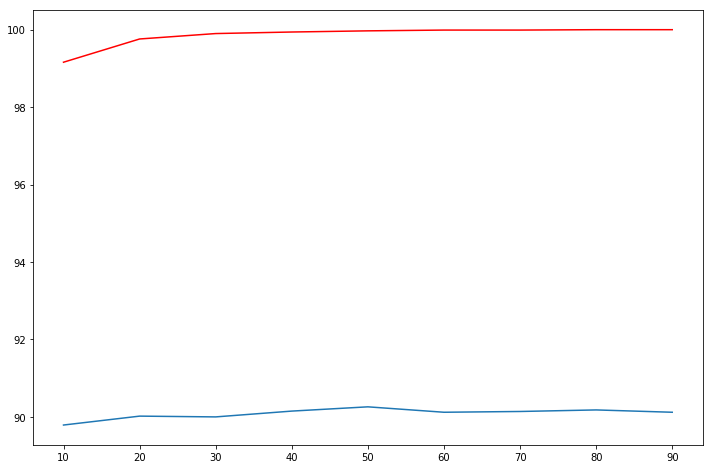

In [186]:
# Vamos agora promover um treinamento mais complexo da Floresta Aleatória, variando o número de árvores de decisão
# (os classificadores-base no Ensemble de modelos conhecido como Floresta Aleatória)
# de 10 em 10, partindo-se de 10 árvores até 100 árvores.
from sklearn.ensemble import RandomForestClassifier
k_plot=[]
t_plot=[]
for k in range(10,100,10):
    fac = RandomForestClassifier(n_estimators=k)
    fac.fit(X_tudo2_train, y_tudo2_train)
    predict=fac.predict(X_tudo2_test)
    accuracy_test=round(fac.score(X_tudo2_test,y_tudo2_test)*100,2)
    accuracy_train=round(fac.score(X_tudo2_train,y_tudo2_train)*100,2)
    k_plot.append(accuracy_test)
    t_plot.append(accuracy_train)

fig,axes=plt.subplots(1,1,figsize=(12,8))

axes.set_xticks(range(10,100,10))
k=range(10,100,10)
plt.plot(k,k_plot)
plt.plot(k,t_plot,'r')    

In [188]:
# Pode-se ver pelo gráfico acima que após 20 árvores de decisão a acurácia no conjunto de teste não varia muito e,
# a partir de 30 árvores, a melhoria é muito pequena.
# Vamos considerar como um modelo final, neste trabalho, uma Floresta Aleatória com 25 árvores de decisão 
# 25 base-classifiers.

In [192]:
fac = RandomForestClassifier(n_estimators=25)
fac.fit(X_tudo2_train, y_tudo2_train)
predict=dt.predict(X_tudo2_test)
accuracy_test=round(dt.score(X_tudo2_test, y_tudo2_test)*100,2)
accuracy_train=round(dt.score(X_tudo2_train, y_tudo2_train)*100,2)
print(accuracy_test)
print(accuracy_train)


86.89
100.0


In [193]:
print ('\nClasification report Test Set:\n', classification_report(y_tudo2_test, predict))
print ('\nConfussion matrix:\n',confusion_matrix(y_tudo2_test, predict))


Clasification report Test Set:
              precision    recall  f1-score   support

          0       0.93      0.92      0.93     13961
          1       0.45      0.48      0.46      1863

avg / total       0.87      0.87      0.87     15824


Confussion matrix:
 [[12856  1105]
 [  969   894]]


In [194]:
# Calculando a importância das features no modelo final

In [ ]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [198]:
feature_importances = pd.DataFrame(fac.feature_importances_,
                                   index = X_tudo2_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

feature_importances

,importance
default,0.001577
loan,0.010115
contact,0.021101
previous,0.021214
marital,0.022332
education,0.027058
housing,0.028080
campaign,0.037918
pdays,0.046011
job,0.048262


In [ ]:
# Do modelo final vemos o ranqueamento das features de acordo com a importância de cada uma na separação das classes da variável-resposta
#y. 
# Da tabela acima vemos que as features mais importantes se encontram na base da tabela. 
# São elas: duration, balance, age, day e month.